# A linear regression example
$ y = wx + b$ <br>
$w=3, \, b=10 $


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pprint import pprint

C:\Users\AutoUser\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AutoUser\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AutoUser\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\AutoUser\Anaconda3\envs\tensorflow\lib\s

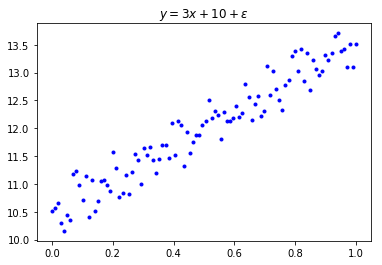

In [2]:
# --------------------------------generate data-------------------------------------
x_in = np.linspace(0, 1, 100)
y_true = 3*x_in + 10 + np.random.rand(len(x_in))

plt.plot(x_in, y_true, 'b.')
plt.title('$ y = 3x + 10 + \epsilon$')
plt.show()




### $ (1)\; \hat y_i = wx_i + b $
### $ (2)\; MSE = \frac{1}{n} \sum_{i=1}^n (\hat y_i - y_i)^2 $

## Three steps for training
1. Build the network
2. Compute the loss
3. Minimize the loss by using gradient descent

In [ ]:
# step 1
inputs = tf.placeholder(dtype=tf.float32, shape=[100], name='X')
y_label = tf.placeholder(dtype=tf.float32, shape=[100], name='label')

w1 = tf.Variable([0.5], dtype=tf.float32, name='weight')
b1 = tf.Variable([0.0], dtype=tf.float32, name='bias') 
y_pred = tf.add(tf.multiply(w1, inputs), b1, name='y_pred')  # y = w1*input + b1 --- (1)

# step 2
loss = tf.reduce_mean(tf.square(y_pred - y_label), name='mse')  # loss is a scaler. --- (2)

# step 3
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_ops = optim.minimize(loss)

init = tf.global_variables_initializer()

![title](pics/ex3-1.PNG)

In [ ]:
y_pred

In [ ]:
pprint(tf.global_variables())

In [ ]:
## train the model
sess = tf.Session()
print("-----start training-----")
sess.run(init)

for step in np.arange(500):
    sess.run(train_ops, feed_dict={inputs: x_in, y_label: y_true})  # update variables
    if step%25 == 0:
        print('step: {:3d}, weight: {:.3f}, bias: {:.3f}'.format(step, sess.run(w1)[0], sess.run(b1)[0]))
               
y_out = sess.run(y_pred, feed_dict={inputs: x_in})

In [ ]:
plt.plot(x_in, y_true, 'b.', label='True')
plt.plot(x_in, y_out, 'r.', label='Predicted')
plt.legend()
plt.show()

sess.close()

![title](pics/ex3-2.PNG)

# Practice
$ y = w_1x^2 + w_2x + b$ <br>
$ w_1=6, \, w_2=-4, \, b=1 $

In [ ]:
x_in = np.linspace(-1, 1, 200)
y_true = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2

plt.plot(x_in, y_true, 'b.')
plt.show()